Jacob Graham

7/26/2023



# Plot Stress - Strain Curves for DPD Shear Rate Study

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import statistics

In [2]:
out_path = 'ss_analysis_out'

In [3]:
if os.path.exists(f'{out_path}') == 0:
    os.mkdir(f'{out_path}')

In [4]:
maxstrain = 2 # 60 to 180 in x-direction
volume = 512000 # box x*y*z

In [5]:
seed = '11111'

In [25]:
totalsteps=100000

In [30]:
with open(f'{os.getcwd()}/all_stress_11111.txt') as f:
    lines = f.readlines()

data = np.zeros([len(lines)-2,7])
ii=0
for line in lines:
    if ii>1: # skip 2 lines
        data[ii-2] = line.strip('\n').split(' ')
    ii+=1
totalsteps = data[-1,0]-data[0,0]
strain_data = (data[:,0]-(data[2,0])+10000)/totalsteps*maxstrain
stress_data = data[:,1:]/volume;

# xx-0.5*(yy+zz)
stress_in_x = stress_data[:,0]-0.5*(stress_data[:,1]+stress_data[:,2])


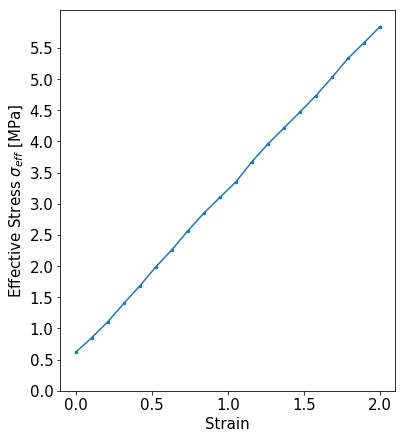

In [32]:
fig = plt.figure(figsize=[6,7])
plt.plot(strain_data, stress_in_x*5.11, '.-',markersize=5)
plt.ylabel('Effective Stress $\sigma_{eff}$ [MPa]',fontsize=15)
plt.xlabel('Strain', fontsize=15)
plt.xticks(np.arange(0,2.5,0.5),fontsize=15)
plt.yticks(np.arange(0,6,0.5),fontsize=15)
plt.savefig('effective_stress_pvf_comparison.png')